In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.special import ellipk

In [2]:
def eq_of_motion(t, y, omega):
    return [y[1], -omega**2 * np.sin(y[0])]

In [3]:
def phase_space_trajectory(y_init, omega = 1.0, has_initial_momentum: bool = False):
    T = 4.0 / omega * ellipk(np.sin(0.5 * y_init[0]))
    if has_initial_momentum:
        T = 0.25 * T
    t_span = [0.0, T]
    t_eval = np.linspace(t_span[0], t_span[1], 5000)
    sol = solve_ivp(eq_of_motion, t_span, y_init, t_eval=t_eval, dense_output=True, rtol=1e-9, args=(omega, ))
    t, p = sol.y

    return t, p

Explanation of `meshgrid`: To evaluate a multi-argument function $f(x, y)$, we need a grid of points with repeating $x$ and $y$ values:
$$\begin{pmatrix}
    (x_1, \, y_1) & \dots & (x_N, \, y_1) \\
    (x_1, \, y_2) & \dots & (x_N, \, y_2) \\
    \vdots & \vdots & \vdots \\
    (x_1, \, y_M) & \dots & (x_N, \, y_M)
\end{pmatrix} \, .$$
`numpy` helps us generating such a grid from 1D-arrays $v_x =[x_1, \, \dots, \, x_N]$ and $v_y = [y_1, \, \dots, \, y_M]$ via `meshgrid`. The function repeats $v_x$ as a row $M$ times and $v_y$ as a column $N$ times, resulting in two $M \times N$ arrays. When passing these 2D-arrays (`T` and `P` in the cell below) to a function, it iterates over the entries one by one resulting in the desired point grid described at the start.  

In [8]:
phi = np.arange(-np.pi, 1.075 * np.pi, 0.075 * np.pi)
p = np.arange(-3.0, 3.0, 0.075)

T, P = np.meshgrid(phi, p)

In [9]:
# set a default value for the pendulum frequnecy
omega = 1.0

# to evaluate eq_of_motion, the time parameter t is not explicitly needed
# therefore we just set it to 0
phi_dot, p_dot = eq_of_motion(0.0, [T, P], omega)
# we calculate the magnitude of each phase space velocity
# we use this a a value to colorcode the arrows in the folling plot
M = np.sqrt(phi_dot**2 + p_dot**2)


# Flow Field in Phase-Space
Explanation of `quiver`: `quiver` allows us to draw a vector field. The first two arguments (`T` and `P` in this case) specify the arrow position. The next two arguments give the arrow direction and length, where we have scaled each direction by its magnitude (given by `M`), to get unit vectors (resp. all vectors will have the same length). The fifth argument (here `M`) is used to color code each arrow individually, where the 'choice' of color is given by the `cmap` argument, specifiying a *colormap*. The `pivot` argument tells the function to set the anchor point in the middle of the arrow. The other options handle the scaling of the arrows. Note that this is set up in a way, that the arrows will not be 1 unit long despite being unit vectors, because this would make the plot illegible. 

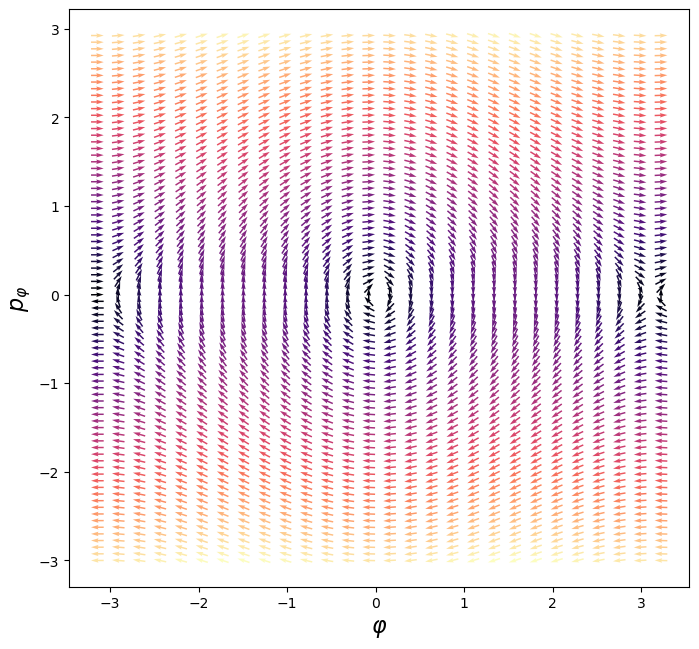

In [10]:
# create a figure
fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.set_aspect('equal')
# label the axes like a real physicist would do ;)
ax.set_xlabel(r'$\varphi$', fontsize=16)
ax.set_ylabel(r'$p_\varphi$', fontsize=16)
# quiver is a little bit messy to use (see explanation above)
# it draws arrows in the direction of the phase space velocity
ax.quiver(T, P, phi_dot / M, p_dot / M, M,
          cmap='magma', pivot='mid', angles='xy', scale_units='xy', scale=7) 
plt.show()

# Phase Space Trajectories
Call the function `phase_space_trajectory` for the following initial values (function parameter `y_init`):
1) $[15^\circ, \, 0.0]$
2) $[90^\circ, \, 0.0]$
3) $[179^\circ, \, 0.0]$
4) $[170^\circ, \, -1.0]$

You have to convert the angles from degrees to radians. This can be done via `np.radians(<angle>)`. The value for the frequency $\omega$ was predefined in the variable `omega` which you are supposed to use. For the last example you should pass the extra argument `has_initial_momentum=True` as your last function parameter.

The `plot` command is called on the axis-object `ax` (defined before) via `ax.plot(<arguments>)`. The first argument should be the angle $\varphi$, the second one the corresponding momentum $p_\varphi$. Immediately after this, you can pass a string to specify the color of your line: `'r'` for red, `'g'` for green, '`b`' for blue, `'k'` for black, etc.

If you want your lines thicker for better visibility, add `lw=3.0` (or any desired floating point value) to you plot arguments.

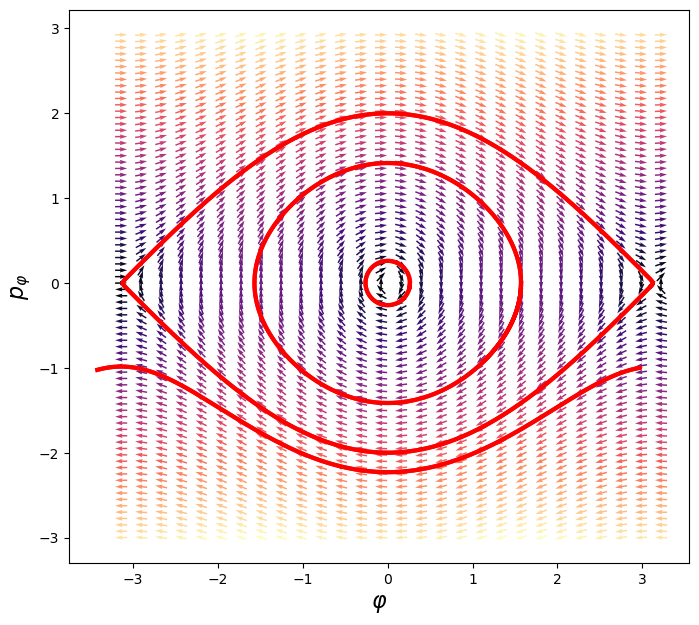

In [12]:

t, p = phase_space_trajectory([np.radians(15.0), 0.0], omega)
ax.plot(t, p, 'r', lw=3.0)

t, p = phase_space_trajectory([np.radians(90.0), 0.0], omega)
ax.plot(t, p, 'r', lw=3.0)

t, p = phase_space_trajectory([np.radians(179.0), 0.0], omega)
ax.plot(t, p, 'r', lw=3.0)

t, p = phase_space_trajectory([np.radians(170.0), -1.0], omega, True)
ax.plot(t, p, 'r', lw=3.0)

# show the figure again
fig